In [181]:
import tensorflow as tf
import os

In [182]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [183]:
tf.config.list_physical_devices('GPU')

[]

In [184]:
import cv2
import imghdr

In [185]:
data_dir = 'asset/data' 
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [186]:
if not os.path.exists(data_dir):
    print("Directorul specificat nu există:", data_dir)
    
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [187]:
import numpy as np
from matplotlib import pyplot as plt

In [188]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 153 files belonging to 2 classes.


In [189]:
data_iterator = data.as_numpy_iterator()

In [190]:
batch = data_iterator.next()

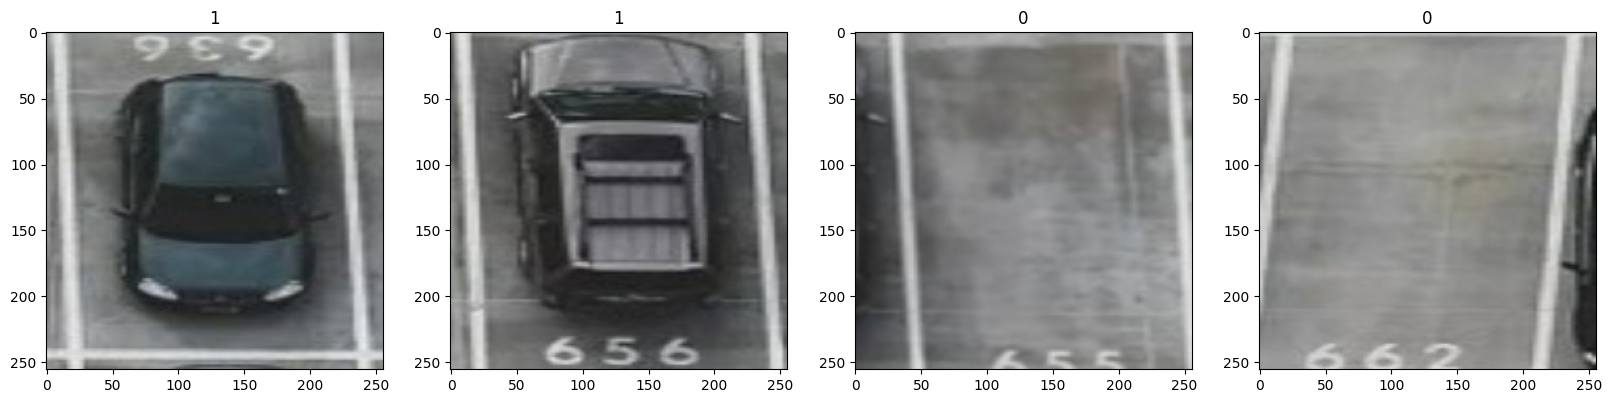

In [191]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [192]:
data = data.map(lambda x,y: (x/255, y))

In [193]:
data.as_numpy_iterator().next()

(array([[[[0.2784314 , 0.2784314 , 0.2784314 ],
          [0.27450982, 0.27450982, 0.27450982],
          [0.27058825, 0.27058825, 0.27058825],
          ...,
          [0.2784314 , 0.2784314 , 0.2784314 ],
          [0.2784314 , 0.2784314 , 0.2784314 ],
          [0.2784314 , 0.2784314 , 0.2784314 ]],
 
         [[0.26666668, 0.26666668, 0.26666668],
          [0.26666668, 0.26666668, 0.26666668],
          [0.26666668, 0.26666668, 0.26666668],
          ...,
          [0.28235295, 0.28235295, 0.28235295],
          [0.28235295, 0.28235295, 0.28235295],
          [0.28235295, 0.28235295, 0.28235295]],
 
         [[0.25882354, 0.25882354, 0.25882354],
          [0.25882354, 0.25882354, 0.25882354],
          [0.25882354, 0.25882354, 0.25882354],
          ...,
          [0.28627452, 0.28627452, 0.28627452],
          [0.28627452, 0.28627452, 0.28627452],
          [0.28627452, 0.28627452, 0.28627452]],
 
         ...,
 
         [[0.63529414, 0.6313726 , 0.6117647 ],
          [0.63529

In [194]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [195]:
train_size

3

In [196]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [197]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [198]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [199]:
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [200]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [201]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 491ms/step - accuracy: 0.4857 - loss: 0.9365 - val_accuracy: 0.3125 - val_loss: 1.8344
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 437ms/step - accuracy: 0.3880 - loss: 1.3341 - val_accuracy: 0.5000 - val_loss: 0.6768
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 368ms/step - accuracy: 0.6263 - loss: 0.6473 - val_accuracy: 0.6250 - val_loss: 0.6059
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 410ms/step - accuracy: 0.5807 - loss: 0.6406 - val_accuracy: 0.6875 - val_loss: 0.5457
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 857ms/step - accuracy: 0.6680 - loss: 0.5316 - val_accuracy: 0.7500 - val_loss: 0.4471
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 399ms/step - accuracy: 0.7461 - loss: 0.5405 - val_accuracy: 0.6562 - val_loss: 0.4852
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 420ms/step - accuracy: 0.7305 - loss: 0.4299 - val_accuracy: 0.9062 - val_loss: 0.3557
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 389ms/step - accuracy: 0.9896 - loss: 0.3230 - val_accuracy: 0.8750 - val_loss:

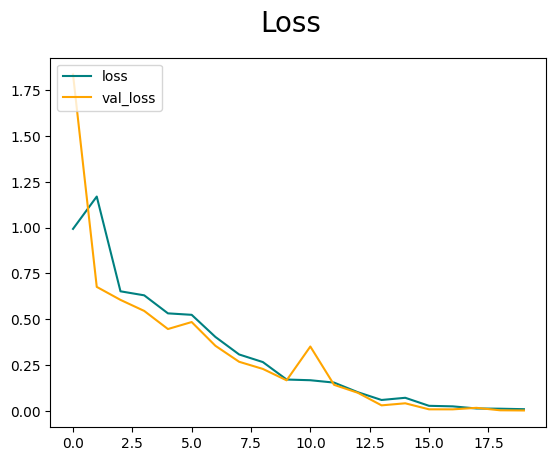

In [202]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

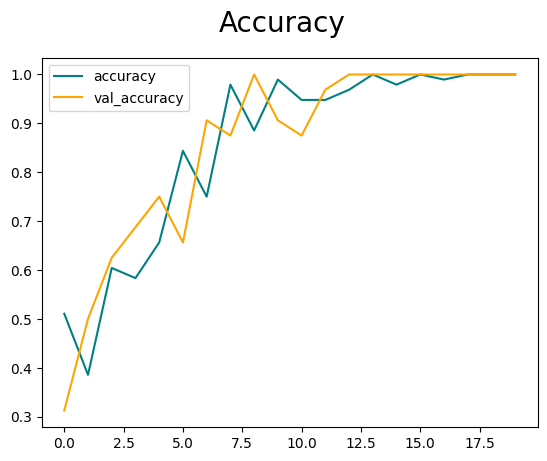

In [203]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [204]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [205]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [206]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [207]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


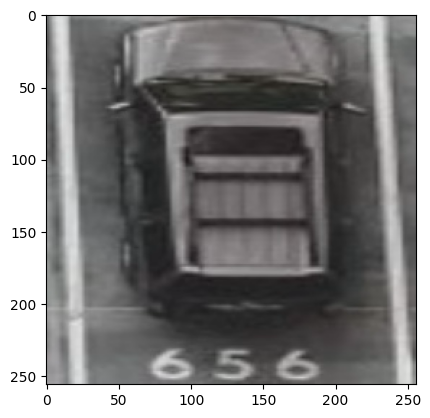

In [208]:
import cv2
img = cv2.imread('asset/resized_livephotoes/44.jpg')
plt.imshow(img)
plt.show()


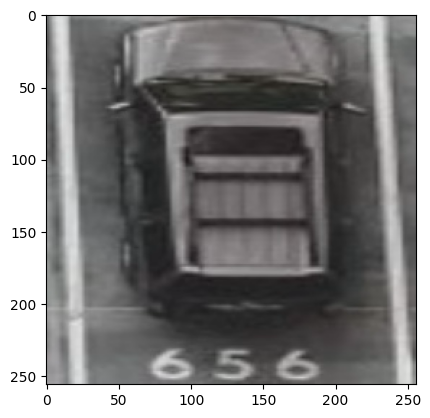

In [209]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [210]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


In [211]:
yhat

array([[0.9987123]], dtype=float32)

In [212]:
if yhat > 0.5: 
    print(f'Predicted class is occ')
else:
    print(f'Predicted class is mpty')

Predicted class is occ


In [213]:
from tensorflow.keras.models import load_model

In [214]:
model.save(os.path.join('asset/models','occ_or_mpty_model_v1.h5'))

In [215]:
new_model = load_model('asset/models/occ_or_mpty_model_v1.h5')

In [216]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


array([[0.9987123]], dtype=float32)